# US Baby Name

## GIỚI THIỆU
Dữ Liệu `US_BaBy_Names.csv` chứa thông tin của các em bé sinh từ 2004 - 2014 tại Mỹ. Dựa vào tập dữ liệu trên, bạn hãy thực hiện các bài tập sau:

## TÌM HIỂU DỮ LIỆU

### 01. Đọc dữ liệu

In [1]:
import pandas as pd
import numpy as np
baby = pd.read_csv('US_Baby_Names.csv')

### 02. Hiển thị 10 dòng dữ liệu bất kỳ

In [4]:
baby.sample(10,random_state=99)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
394,11743,11744,Isis,2005,F,AK,5
383632,2062747,2062748,Allen,2011,M,KY,13
208453,1076538,1076539,Zenaida,2014,F,FL,6
155915,805960,805961,Gilbert,2010,M,CO,9
139582,754819,754820,Eileen,2004,F,CO,10
491091,2696632,2696633,Summer,2014,F,MN,28
579862,3262886,3262887,Zoey,2007,F,NE,27
104977,563040,563041,Estefani,2014,F,CA,17
263318,1326546,1326547,Khari,2014,M,GA,7
511281,2815004,2815005,Abrielle,2013,F,MO,8


### 03. Cho biết kích thước dữ liệu

In [5]:
baby.shape

(1016395, 7)

### 04. Xóa 2 cột 'Unnamed: 0' and 'Id'

In [12]:
baby_cleaned = baby.drop(columns=['Unnamed: 0', 'Id'])
baby_cleaned.to_csv('baby_after_remove.csv',index=False)

baby_after_remove = pd.read_csv('baby_after_remove.csv')
baby_after_remove.head()



,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41


### 05. Cho biết số lượng bé trai, bé gái?

In [18]:
baby[baby.Gender=='F'].count()


Unnamed: 0    558846
Id            558846
Name          558846
Year          558846
Gender        558846
State         558846
Count         558846
dtype: int64

In [19]:
baby[baby.Gender=='M'].count()

Unnamed: 0    457549
Id            457549
Name          457549
Year          457549
Gender        457549
State         457549
Count         457549
dtype: int64

In [20]:
baby.groupby(['Gender']).size()

Gender
F    558846
M    457549
dtype: int64

### 06. Trong bộ dữ liệu có bao nhiêu tên khác nhau?

In [13]:
baby.Name.count()

1016395

### 07. Tên nào xuất hiện ít nhất?

In [21]:
name_count= baby.Name.value_counts()
least_frequent_name = name_count[ name_count== name_count.min()]
print(least_frequent_name)

Name
Grettell    1
Dawsen      1
Abenezer    1
Greenley    1
Daiden      1
           ..
Terryn      1
Yanna       1
Zemirah     1
Emmilyn     1
Coalton     1
Name: count, Length: 3682, dtype: int64


### 08. Top 10 tên được sử dụng nhiều nhất?

In [35]:
name_count= baby.Name.value_counts()
sorted_name_counts = name_count.sort_values(ascending=False)
top_10_least_frequent_names = sorted_name_counts.head(10)
print(top_10_least_frequent_names)

Name
Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
Taylor    1033
Jayden    1031
Alexis     984
Payton     971
Dakota     962
Name: count, dtype: int64


## TRỰC QUAN DỮ LIỆU

### 09. Vẽ đồ thị top 10 tên xuất hiện nhiều nhất năm 2014

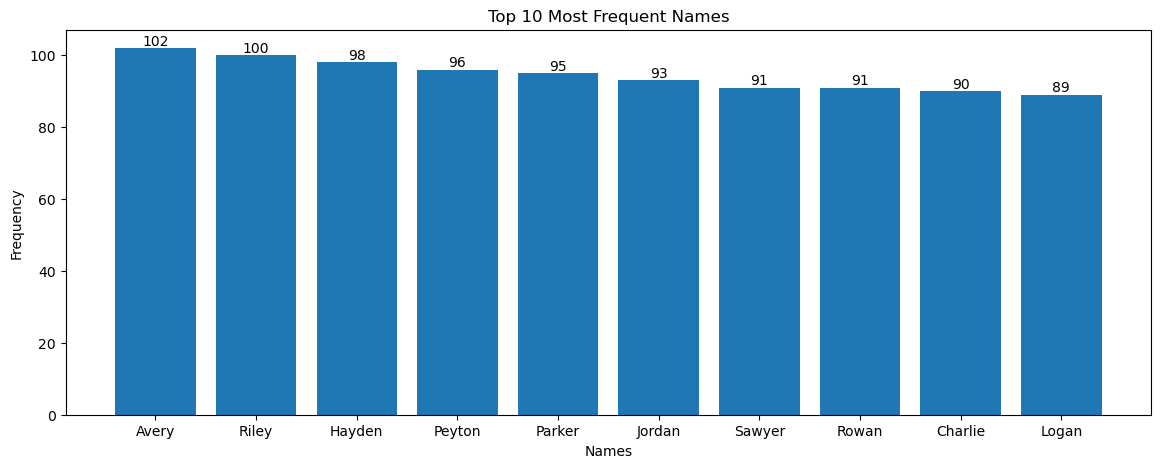

In [96]:
import matplotlib.pyplot as plt
ten_Trong_Nam2014 = baby[baby.Year == 2014]
name_count= ten_Trong_Nam2014.Name.value_counts()
sorted_name_counts = name_count.sort_values(ascending=False)
top_10_most_frequent_names = sorted_name_counts.head(10)

# print(top_10_most_frequent_names)
# Plotting the bar chart
plt.figure(figsize=(14, 5))
bars= plt.bar(top_10_most_frequent_names.index, top_10_most_frequent_names.values)

for bar in bars:
    yval = bar.get_height()
    #x (float): The x-coordinate for the text location.
    #y (float): The y-coordinate for the text location.
    #s (str):The string of text that you want to display
    #va (vertical alignment):
    #  'top': Aligns text above the y coordinate.
    # 'center': Centers the text at the y coordinate.
    # 'bottom': Aligns text below the y coordinate.
    # 'baseline': Aligns text at the baseline of the font.
    #ha (horizontal alignment): Controls the horizontal alignment of the text relative to the x coordinate
    # 'left': Aligns text to the left of the x coordinate.
    # 'center': Centers the text at the x coordinate.
    # 'right': Aligns text to the right of the x coordinate.
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.title('Top 10 Most Frequent Names')
plt.xlabel('Names')
plt.ylabel('Frequency')
plt.show()

### 10. Vẽ đồ thị thể hiện tỷ lệ nam nữ qua các năm 2004-2014

[44.36125897 44.40753045 44.60856399 44.6274859  44.64778351 45.05068228
 45.25169601 45.26878816 45.47428621 45.61314601 45.79810511]
[55.63874103 55.59246955 55.39143601 55.3725141  55.35221649 54.94931772
 54.74830399 54.73121184 54.52571379 54.38685399 54.20189489]


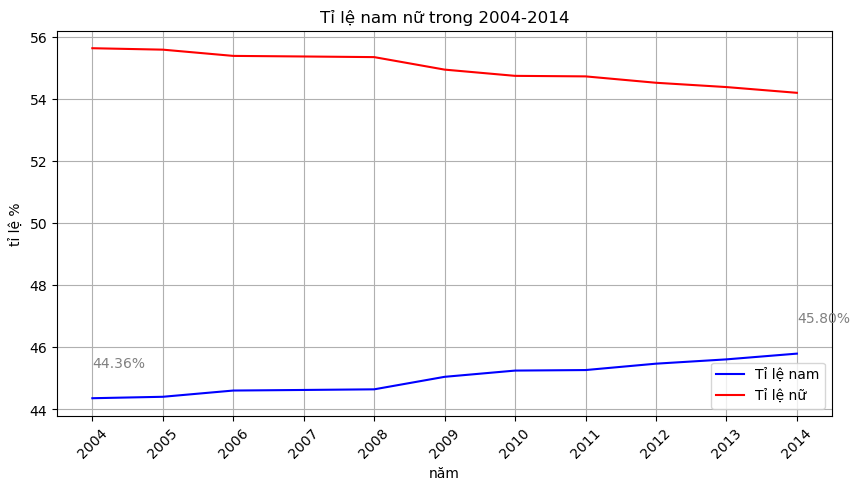

In [220]:
import numpy as np
baby= baby.loc[(baby.Year >=2004) &  (baby.Year <=2014),['Id','Year','Gender']]

nam = baby[baby.Gender =='M']
nu = baby[baby.Gender =='F'] 
so_Luong_Nam = nam.groupby(['Year']).size()
so_Luong_Nu = nu.groupby(['Year']).size()

arr_Nam = np.array(so_Luong_Nam)
arr_Nu = np.array(so_Luong_Nu)

tong_So_Luong=np.add(arr_Nam , arr_Nu)
ti_Le_Nam= (arr_Nam/tong_So_Luong)*100
ti_Le_Nu = (arr_Nu/tong_So_Luong)*100
print(ti_Le_Nam)
print(ti_Le_Nu)
x= so_Luong_Nam.index

plt.figure(figsize=(10,5))
plt.plot(x, ti_Le_Nam, 'b',label="Tỉ lệ nam")
plt.plot(x,ti_Le_Nu, 'r',label="Tỉ lệ nữ")
plt.title('Tỉ lệ nam nữ trong 2004-2014')
plt.xlabel('năm')
plt.ylabel('tỉ lệ %')
# chỉnh trục x đầy đủ năm
plt.xticks(ticks=x, rotation=45)
# thêm text đầu cuoi
start=2004 
end =2014

plt.text(start,ti_Le_Nam[0]+1, f"{ti_Le_Nam[0]:.2f}%", color='gray')
plt.text(end, ti_Le_Nam[-1]+1, "%0.2f%%"%(ti_Le_Nam[-1]), color='gray')

plt.legend(loc="lower right")
plt.grid(True) 
plt.show()